In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)


iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


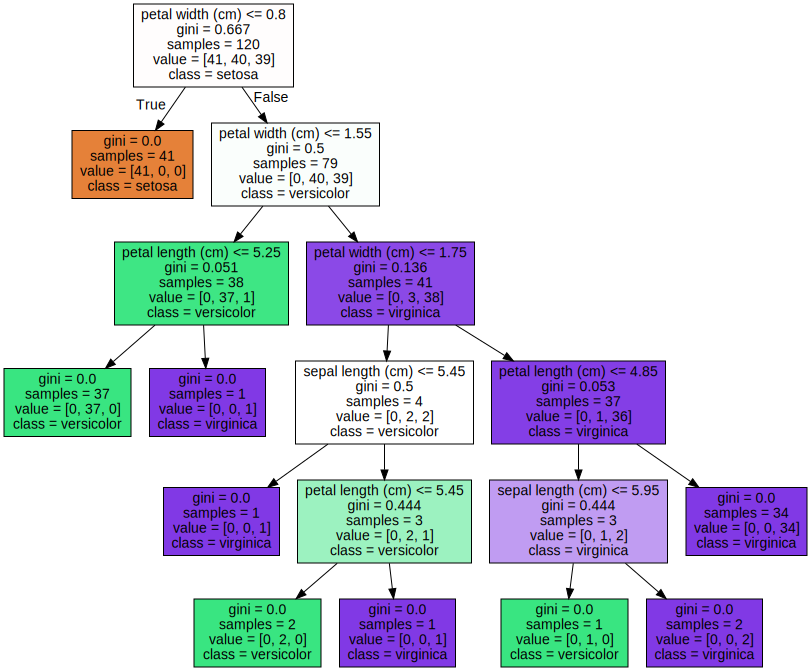

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### graphviz: impurity=False로 설정 => 지니계수 미적용

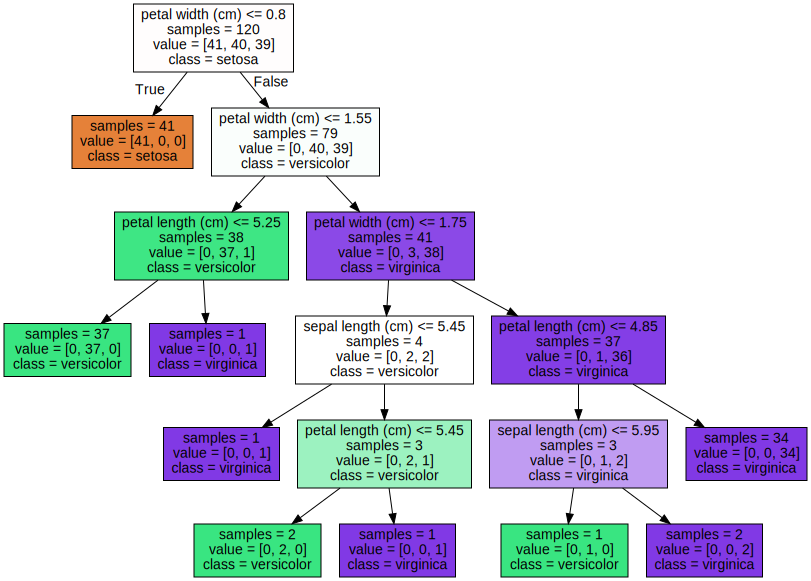

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=False, filled=True) #impurity=False로 설정
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### graphviz: max_depth 설정

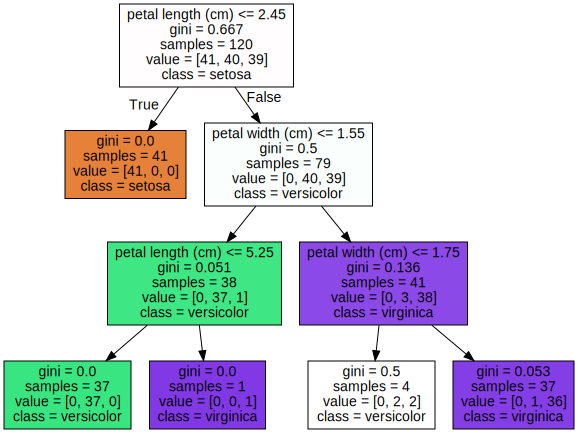

In [4]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)
# pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### graphviz: min_samples_leaf 적용

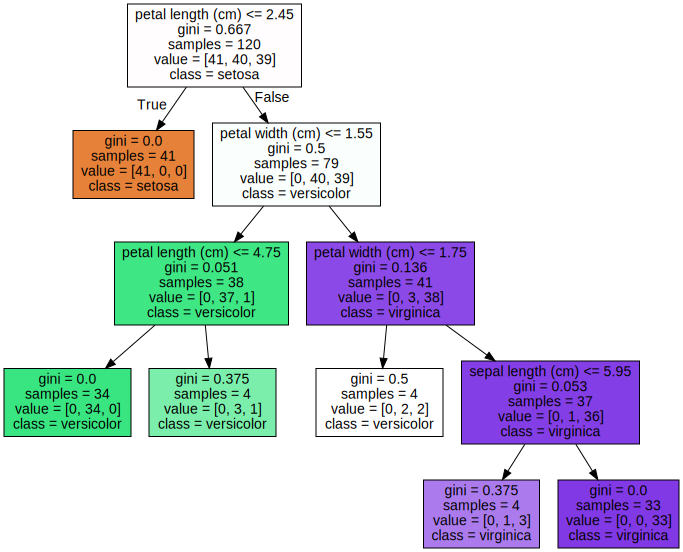

In [5]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)
# pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


<AxesSubplot: >

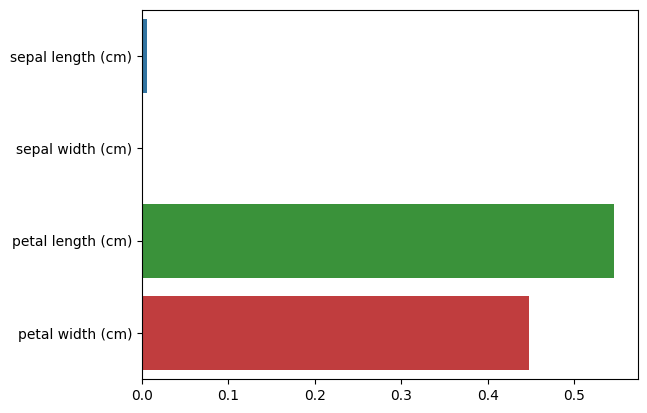

In [7]:
import seaborn as sns
import numpy as np

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

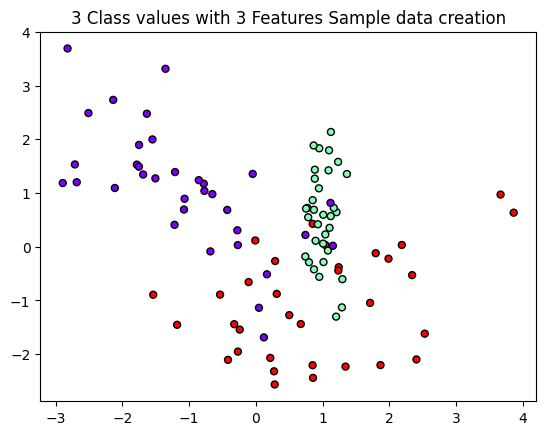

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 3 Features Sample data creation')
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(x_features[:, 0], x_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [11]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\hanna\AppData\Local\Temp\ipykernel_1096\2541824262.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


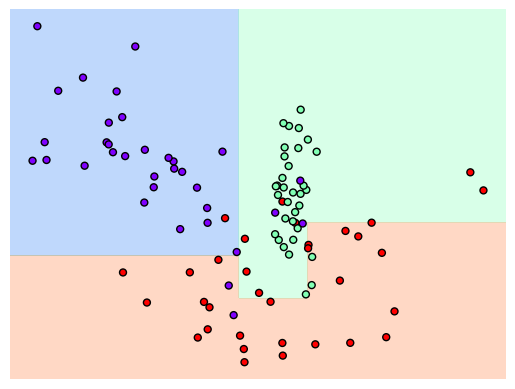

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)